In [188]:
def get_sorce(ref_name,est_name):
    import mir_eval
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    scores = []
    for i in range(1,201):
        try:
            ref_path = './data/{0}/annotations/Labels/{1:03d}.txt'.format(ref_name,i)
            est_path = './test/result/{0}/{1:03d}.lab'.format(est_name,i)
            ref_intervals,ref_labels = mir_eval.io.load_labeled_intervals(ref_path)
            est_intervals,est_labels = mir_eval.io.load_labeled_intervals(est_path)
            est_intervals, est_labels = mir_eval.util.adjust_intervals(est_intervals, est_labels, ref_intervals.min(),ref_intervals.max(), mir_eval.chord.NO_CHORD,mir_eval.chord.NO_CHORD)
            (intervals,ref_labels,est_labels) = mir_eval.util.merge_labeled_intervals(ref_intervals, ref_labels, est_intervals, est_labels)
            durations = mir_eval.util.intervals_to_durations(intervals)
            comparisons = mir_eval.chord.sevenths(ref_labels, est_labels)
            score = mir_eval.chord.weighted_accuracy(comparisons, durations)
            scores.append(score)
        except:
            scores.append(0)
    plt.figure(figsize=(15,5))
    sns.distplot(scores)
    return np.array(scores).mean()


/opt/conda/lib/python3.7/site-packages/mir_eval/io.py:240: UserWarning: All interval durations must be strictly positive
  warnings.warn(error.args[0])


0.7465176266307122

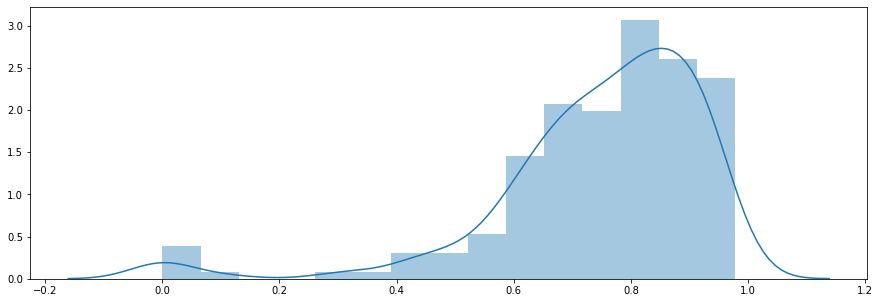

In [192]:
get_sorce('ce200','idx_0')

/opt/conda/lib/python3.7/site-packages/mir_eval/io.py:240: UserWarning: All interval durations must be strictly positive
  warnings.warn(error.args[0])


0.7419336132413423

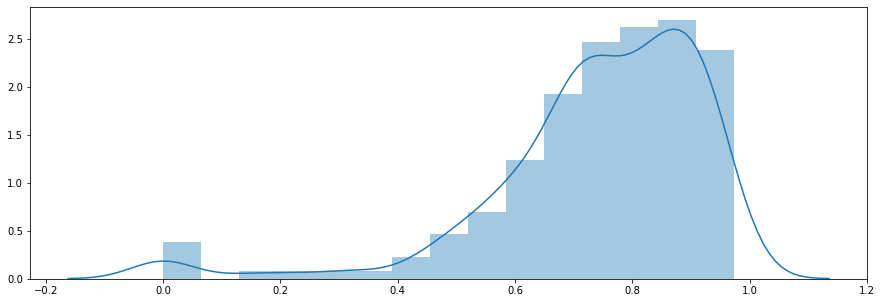

In [191]:
get_sorce('ce200','idx_1')

In [193]:
import json
est_name = 'idx_1'
result = {}
for c in range(1,201):
    try:
        f  = open('./test/result/{0}/{1:03d}.lab'.format(est_name,c),'r')
        txt = f.readlines()
        tmps = []
        for i in range(len(txt)):
            line = txt[i].split(' ')
            tmp = [float(i) for i in line[:2]]
            tmp.append(line[2].replace('\n',""))
            tmps.append(tmp)
        result[str(c)] = tmps
    except:
        result[str(c)] = [[0.0,1.0,'N']]

with open('test/score/'+est_name+'.json', 'w') as outfile:
    json.dump(result, outfile)